# 선형회귀분석 with Eager API

텐서플로의 Eager API를 이용한 선형회귀분석

- Author: Aymeric Damien
- Translator: ByungWook Kang
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [2]:
# Eager API 설정
tfe.enable_eager_execution()

In [3]:
# 훈련 데이터
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# 인자값 설정
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
# 가중치(Weight) 및 오차값(Bias) 설정
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# 선형회귀 방정식 (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# 평균 제곱근 편차(Mean square error)
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [5]:
# 확률적 경사하강 최적화(SGD Optimizer)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# 경사값을 계산
grad = tfe.implicit_gradients(mean_square_fn)

Initial cost= 32.729095459 W= -1.1451541 b= 2.1095874
Epoch: 0001 cost= 9.990811348 W= -0.6082742 b= 2.1834855
Epoch: 0100 cost= 0.183041543 W= 0.06695344 b= 2.10811
Epoch: 0200 cost= 0.160157323 W= 0.088075474 b= 1.9583642
Epoch: 0300 cost= 0.142208204 W= 0.106781885 b= 1.8257443
Epoch: 0400 cost= 0.128130019 W= 0.12334882 b= 1.7082921
Epoch: 0500 cost= 0.117087886 W= 0.13802105 b= 1.6042725
Epoch: 0600 cost= 0.108427182 W= 0.15101513 b= 1.5121504
Epoch: 0700 cost= 0.101634249 W= 0.16252303 b= 1.4305645
Epoch: 0800 cost= 0.096306257 W= 0.17271484 b= 1.3583091
Epoch: 0900 cost= 0.092127323 W= 0.18174094 b= 1.2943182
Epoch: 1000 cost= 0.088849612 W= 0.18973477 b= 1.2376455


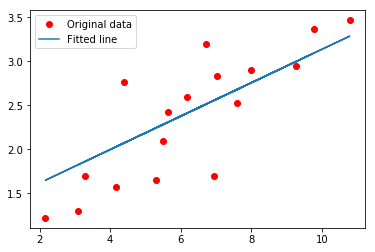

In [6]:
# 최적화 이전의 초기 cost값
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# 훈련
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# 시각화
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()